In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
from matplotlib import pyplot  as plt
import numpy as np
import math

In [2]:
mtcnn = MTCNN(image_size=160,
              margin=0,
              min_face_size=20,
              thresholds=[0.6, 0.7, 0.7], # MTCNN thresholds
              factor=0.709,
              post_process=True,
              device='cpu' # If you don't have GPU
        )

In [3]:
# Landmarks: [Left Eye], [Right eye], [nose], [left mouth], [right mouth]
def npAngle(a, b, c):
    ba = a - b
    bc = c - b 
    
    cosine_angle = np.dot(ba, bc)/(np.linalg.norm(ba)*np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    
    return np.degrees(angle)

In [4]:
def visualize(image, landmarks, angle_R, angle_L, pred):
    fig , ax = plt.subplots(1, 1, figsize= (10,10))
    ax.set_title("Output Image")
    ax.imshow(image)
    point1 = [landmarks[0][0][0], landmarks[0][1][0]]
    point2 = [landmarks[0][0][1], landmarks[0][1][1]]

    point3 = [landmarks[0][2][0], landmarks[0][0][0]]
    point4 = [landmarks[0][2][1], landmarks[0][0][1]]
    
    point5 = [landmarks[0][2][0], landmarks[0][1][0]]
    point6 = [landmarks[0][2][1], landmarks[0][1][1]]
    for land in landmarks[0]:
        ax.scatter(land[0], land[1])
    plt.plot(point1, point2, 'y', linewidth=3)
    plt.plot(point3, point4, 'y', linewidth=3)
    plt.plot(point5, point6, 'y', linewidth=3)
    plt.text(10, 10, f"Detect: {pred} \n Angles: {math.floor(angle_L)}, {math.floor(angle_R)}", 
            size=20, ha="center", va="center", bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

In [5]:
def predFacePose(imgaePath):

    im = Image.open(imgaePath) # Reading the image
    
    if im.mode != "RGB": # Convert the image if it has more than 3 channels, because MTCNN will refuse anything more than 3 channels.
        im = im.convert('RGB')
    
    bbox, prob, landmarks = mtcnn.detect(im, landmarks=True) # The detection part producing bounding box, probability of the detected face, and the facial landmarks
    print(f"bbox: {prob}")
    if bbox is not None: # To check if we detect a face in the image
        if prob > 0.9: # To check if the detected face has probability more than 90%, to avoid 
        
            angR = npAngle(landmarks[0][0], landmarks[0][1], landmarks[0][2]) # Calculate the right eye angle
            angL = npAngle(landmarks[0][1], landmarks[0][0], landmarks[0][2])# Calculate the left eye angle

            if ((int(angR) in range(35, 57)) and (int(angL) in range(35, 58))):
                predLabel='Frontal'
                visualize(im, landmarks, angR, angL, predLabel)
            else: 
                if angR < angL:
                    predLabel='Left Profile'
                else:
                    predLabel='Right Profile'
                visualize(im, landmarks, angR, angL, predLabel)
        else:
            print('The detected face is Less then the detection threshold')
    else:
        print('No face detected in the image')

bbox: [0.99998593]


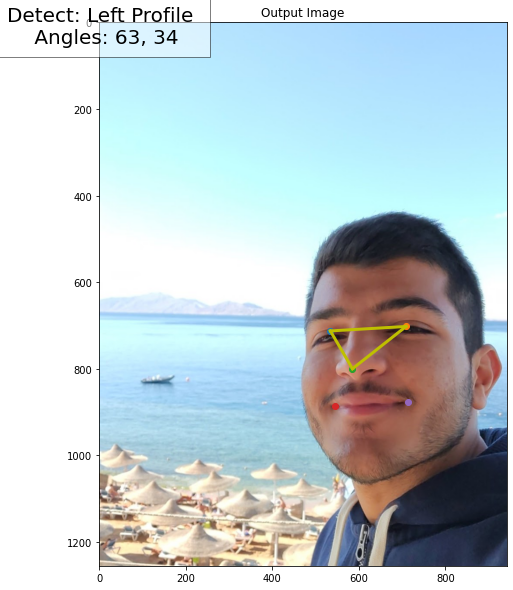

In [7]:
predFacePose("Image/Path")